## Accuracy and stability of timestepping schemes

Aim: Implement a variety of time stepping schemes for solving
the initial value problem
\begin{equation}
\label{eq1}
\frac{dy}{dt} = F(y);\ \ \ y(0)=y_0
\end{equation}
and examine their accuracy and stability.


### Forward Euler, leapfrog, and Matsuno schemes

Three schemes to be investigated are

Forward (Euler) scheme:

$y^{n+1} = y^{n} + F(y^{n}) \Delta t$

Leapfrog scheme:

$y^{n+1} = y^{n-1} + 2 F(y^{n}) \Delta t$

Forward/backward (Matsuno) scheme:

$y^{\mathrm{*}} = y^{n} + F(y^{n}) \Delta t$

$y^{n+1} = y^{n} + F(y^{\mathrm{*}}) \Delta t$

1. Write down the true solution for the two cases $F(y) = -\lambda y$
and $F(y) = i \omega y$ ($\lambda$ and $\omega$ real,
$\lambda > 0$). For these two cases, do stability analysis for
the Matsuno scheme to obtain the amplification factor. Under what
conditions is the Matsuno scheme stable?

2. Write a python procedure to solve the initial value problem when $y$
is a complex number, using each of the above schemes. Use a python function to specify $F(y)$ so that only this code needs to be changed to use different functions $F$.

3. Use your procedure to solve the initial value problem for $F(y) = -\lambda y$
and $\lambda = 1$ over the time interval $0 \le t \le 5$
with initial condition $y = 1 + i 0$. Use $\Delta t = 0.1$.
Plot the real part of the solution versus time. What kinds of errors
are found for each scheme? Which schemes are stable? Are your
conclusions consistent with the theory?

4. Repeat part 3 for $F(y) = i \omega y$ with $\omega = 1$.
Now what kinds of errors are found with each scheme, and which
schemes are stable?

### Extension

Repeat parts 3 and 4 for some of the following alternative schemes:

* Backward (Euler) scheme:

    $y^{n+1} = y^{(n)} + F(y^{n+1}) \Delta t$
    

* Trapezoidal implicit scheme:

    $y^{n+1} = y^{n} + \frac{1}{2}( F(y^{n}) + F(y^{n+1})) \Delta t$
    

* 2nd order Adams-Bashforth:

    $y^{n+1} = y^{n} + \frac{1}{2} \left( 3 F(y^{n}) - F(y^{n-1}) \right) \Delta t$


* 3rd order Adams-Bashforth:

    $y^{n+1} = y^{n} + \frac{1}{12}( 23 F(y^{n}) - 16F(y^{n-1}) + 5 F(y^{n-2})) \Delta t$


* 2nd order Runge-Kutta:

    $y^{\mathrm{*}} = y^{n} + \frac{1}{2} F(y^{n}) \Delta t$

    $y^{n+1} = y^{n} + F(y^{\mathrm{*}}) \Delta t$


* 4th order Runge-Kutta:

    $q_1 = F(y^{n}) \Delta t$

    $q_2 = F(y^{n} + \frac{q_1}{2}) \Delta t$

    $q_3 = F(y^{n} + \frac{q_2}{2}) \Delta t$

    $q_4 = F(y^{n} + q_3) \Delta t$

    $y^{n+1} = y^{n} + \frac{1}{6}(q_1 + 2 q_2 + 2 q_3 + q_4)$


Note that some of these are implicit schemes: $y^{n+1}$ appears on
both sides of the equation. So you will need to rearrange the equation to express $y^{n+1}$ in terms of $y^{n}$.

For the Adams-Bashforth methods, use a forward Euler step for the
first step and, where required, a lower order Adams-Bashforth method
for the next step(s).

Some of these schemes are very accurate, so you might need to use
a larger time step to begin to see significant errors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def steps_required(time_step, total_time):
  return (int(total_time // time_step) + 1)

def timestep(F, scheme, initial_value, time_step, total_time):
  steps = steps_required(time_step, total_time)

  y_last = initial_value
  y = initial_value

  y_real_points = np.array([])
  time_step_points = np.array([])
  for step in range(steps):
    y_real_points = np.append(y_real_points, y.real)
    time_step_points = np.append(time_step_points, step*time_step)

    y_next = scheme(F, y, y_last, time_step)
    y_last = y
    y = y_next
  return (time_step_points, y_real_points)

def euler(F, y, y_last, time_step):
  return y + F(y) * time_step


def leapfrog(F, y, y_last, time_step):
  return y_last + (2 * F(y) * time_step)

def matsuno(F, y, y_last, time_step):
  return y + (F((y + F(y) * time_step)) * time_step)


def F(y):
  llambda = 1
  return -(llambda * y)

def create_plot(F, scheme, initial_value, time_step, total_time):
  t_points, y_points = timestep(F, scheme, initial_value, time_step, total_time)
  plt.plot(t_points, y_points)
  plt.xlabel("time")
  plt.ylabel("y")
  plt.title(scheme.__name__)


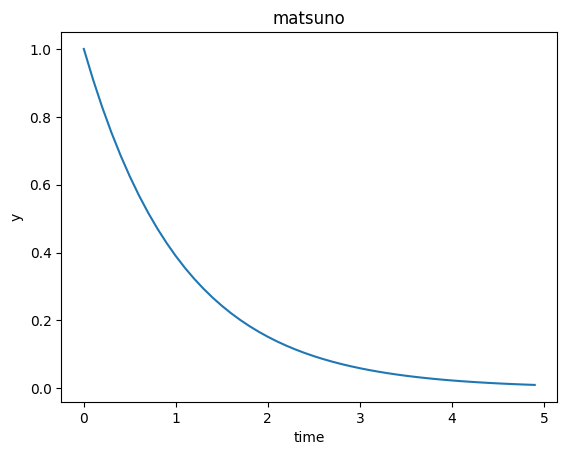

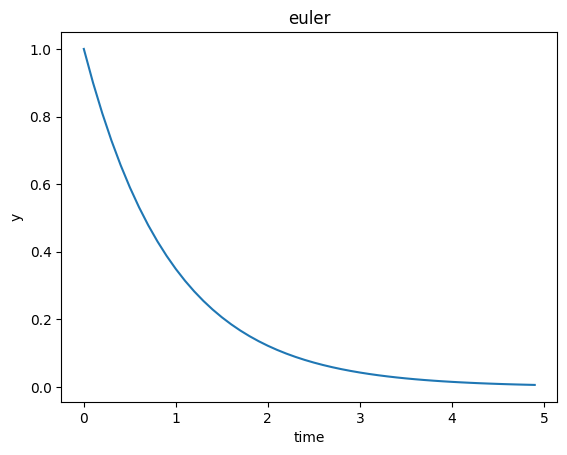

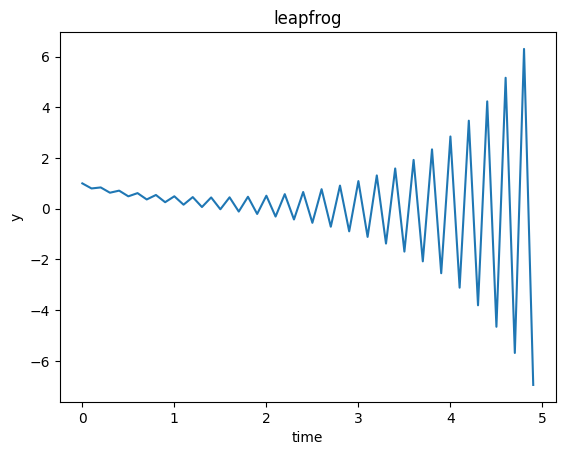

In [3]:
y_initial = 1 + 0j
time_step = 0.1
total_time = 5

create_plot(F, matsuno, y_initial, time_step, total_time)
plt.show()
plt.close()
create_plot(F, euler, y_initial, time_step, total_time)
plt.show()
plt.close()
create_plot(F, leapfrog, y_initial, time_step, total_time)
plt.show()
plt.close()